# 주제 : 데이터 분석으로 심부전증을 예방할 수 있을까?
----------
## 데이터 소개
    - 이번 주제는 Heart Failure Prediction 데이터셋을 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    heart_failure_clinical_records_dataset.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    age: 환자의 나이
    anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
    creatinine_phosphokinase: 크레아틴키나제 검사 결과 (심장, 뇌, 골격근, 및 다른 조직에서 발견되는 효소)
    diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
    ejection_fraction: 박출계수 (%)
    high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
    platelets: 혈소판 수 (kiloplatelets/mL)
    serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
    serum_sodium: 혈중 나트륨 레벨 (mEq/L)
    sex: 성별 (0: 여성, 1: 남성)
    smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
    time: 관찰 기간 (일)
    DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)

    - 심부전증
    심장의 이상으로 인해 심실의 혈액 충만 혹은 심실의 혈액 박출에 이상이 발생하여 울혈 혹은 피로 등으로 발생하는 임상 증후군을 뜻한다. 심장이 각종 장기와 조직의 대사에 필요한 혈류를 제대로 공급하지 못하는 상태를 통칭한다.
    
    
    
- 데이터 출처: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data


## 최종 목표
    - 의료 데이터와 그 분석에 대한 이해
    - Colab 및 Pandas 라이브러리 사용법 이해
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - Classification 모델의 학습과 평가 방법 이해

- 출제자 : 신제용 강사
---

## Step 0. 의료 데이터셋에 대하여

### Accuracy, Precision, 그리고 Recall
- 의료 데이터에서는 Recall이 제일 중요함 (실제 병에 걸린 환자들 중 내가 맞춘 환자)
- precision_recall_plot: recall이 precision을 유지하면서 얼마나 높게 그려지나

## Step 1. 데이터셋 준비하기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Colab Notebook에 Kaggle API 세팅하기


In [ ]:
import os

In [ ]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기


### 2. 데이터 다운로드 및 압축 해제하기


In [ ]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기

!kaggle datasets download -d andrewmvd/heart-failure-clinical-data
!unzip '*.zip'

  0% 0.00/3.97k [00:00<?, ?B/s]
100% 3.97k/3.97k [00:00<00:00, 6.05MB/s]
Archive:  heart-failure-clinical-data.zip
  inflating: heart_failure_clinical_records_dataset.csv  


In [ ]:
!ls

heart-failure-clinical-data.zip		    sample_data
heart_failure_clinical_records_dataset.csv


### 3. Pandas 라이브러리로 csv파일 읽어들이기


In [ ]:
# pd.read_csv()로 csv파일 읽어들이기
df = pd.read_csv('./heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Step 2. EDA 및 데이터 기초 통계 분석


### 4. 데이터프레임의 각 컬럼 분석하기


In [ ]:
# DataFrame에서 제공하는 메소드를 이용하여 컬럼 분석하기 (head(), info(), describe())
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
'''
creatinine_phosphokinase: maximum에 해당하는 값은 outlier 취급해서 배제할 필요가 있겠다
time과 death_event는 correlation되있음 (사망한 경우 관찰일자가 멈추기때문에)
'''

df.describe() # 수치형 데이터의 통계

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### 5. 수치형 데이터의 히스토그램 그리기


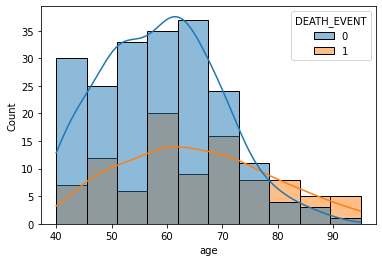

In [ ]:
# seaborn의 histplot, jointplot, pairplot을 이용해 히스토그램 그리기
sns.histplot(df, x='age', hue='DEATH_EVENT', kde=True)

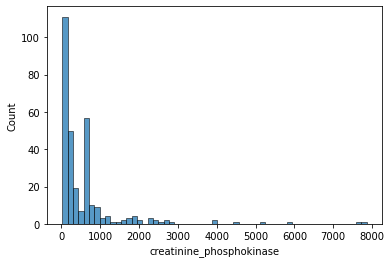

In [ ]:
sns.histplot(data=df, x='creatinine_phosphokinase')
# outlier가 많아서 hist로 유용한 데이터 보기위해 조건을 사용

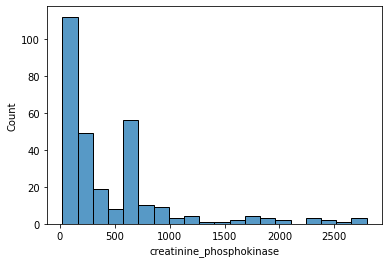

In [ ]:
sns.histplot(data=df.loc[df['creatinine_phosphokinase'] < 3000, 'creatinine_phosphokinase'])
# 크레아틴키나제 < 1000개가 대부분
# 그래도 통계적 특성이 잘 들어나지않음

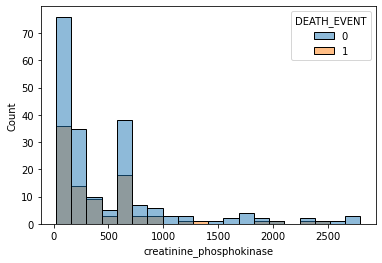

In [ ]:
sns.histplot(data=df.loc[df['creatinine_phosphokinase'] < 3000], x='creatinine_phosphokinase', hue='DEATH_EVENT')

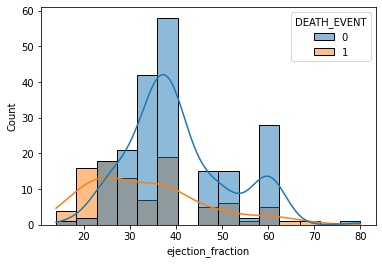

In [ ]:
sns.histplot(data=df, x='ejection_fraction', hue='DEATH_EVENT',kde='True')
# 중간에 비어있는건 bins를 통해 조절해서 보면 됨

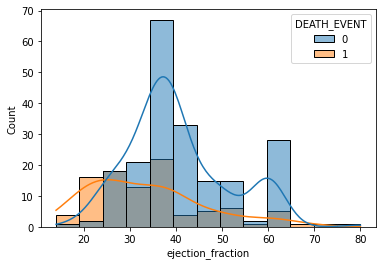

In [ ]:
sns.histplot(data=df, x='ejection_fraction', hue='DEATH_EVENT', bins=13, kde='True')
# 박출계수가 < 40% 일때 사망이 많다
# ejection_fraction이 낮은 경우 사망이 많다 => precision을 높이는 데 유용할 것 같지만, recall을 높이는 데는 유용하지 못할 것 같음

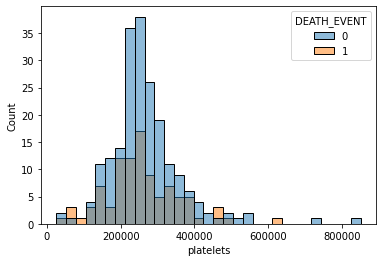

In [ ]:
sns.histplot(data=df, x='platelets', hue='DEATH_EVENT') # 혈소판 수
# 통계를 보는 데 hist가 유용한 것 같음
# death_event와는 상관이 없는 것 같음

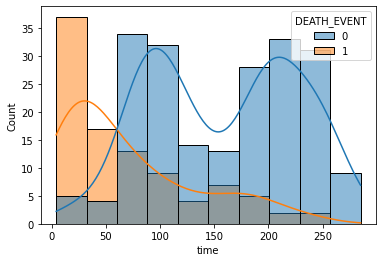

In [ ]:
sns.histplot(x='time', data=df, hue='DEATH_EVENT', kde=True) # 관찰일수

# 사망하면 관찰일수가 초반에 몰려있고 점점 떨어지는, 생존하면 쌍봉형태
# 사망결과를 보았기때문에 time이 정해진 것 -> data requeeze?
# 즉 time에는 death_event의 결과가 이미 포함되어있음 => time은 배제하고 분석

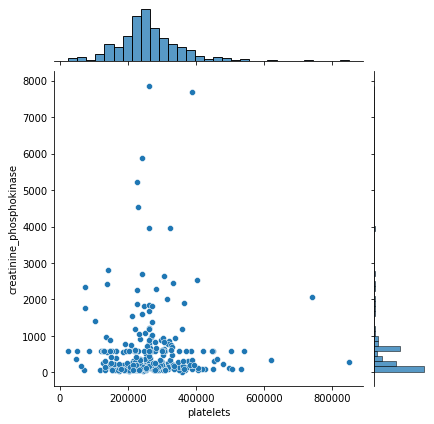

In [ ]:
sns.jointplot(data=df, x='platelets', y='creatinine_phosphokinase') 
# 혈소판수 < 400000 & 크레아틴키나제 < 1000 

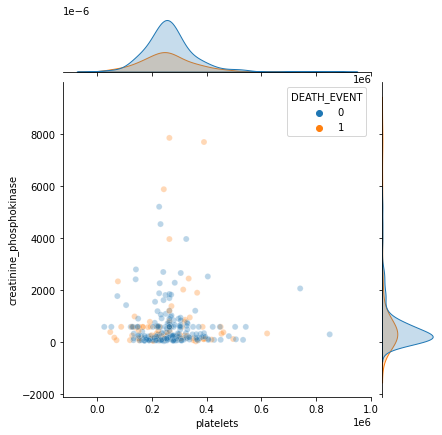

In [ ]:
sns.jointplot(x='platelets', y='creatinine_phosphokinase', hue='DEATH_EVENT', data=df, alpha=0.3)
# 많이 겹쳐있는 것들은 alpha로 투명도 조절해서 확인

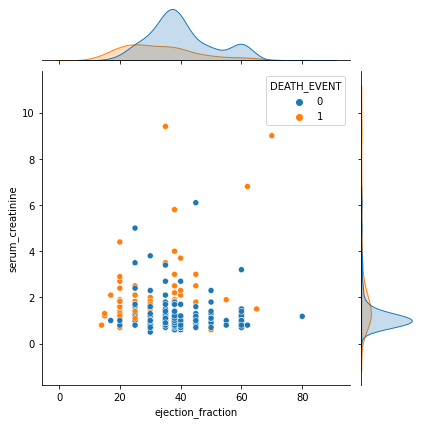

In [ ]:
sns.jointplot(data=df, x='ejection_fraction', y='serum_creatinine', hue='DEATH_EVENT') # 박출계수, 혈중 크레아틴 레벨

# 사망자가 좀 잘 구분되어있음, 일차 직선보다는 복잡한 선을 통해 학습하면 잘 될 것 같음

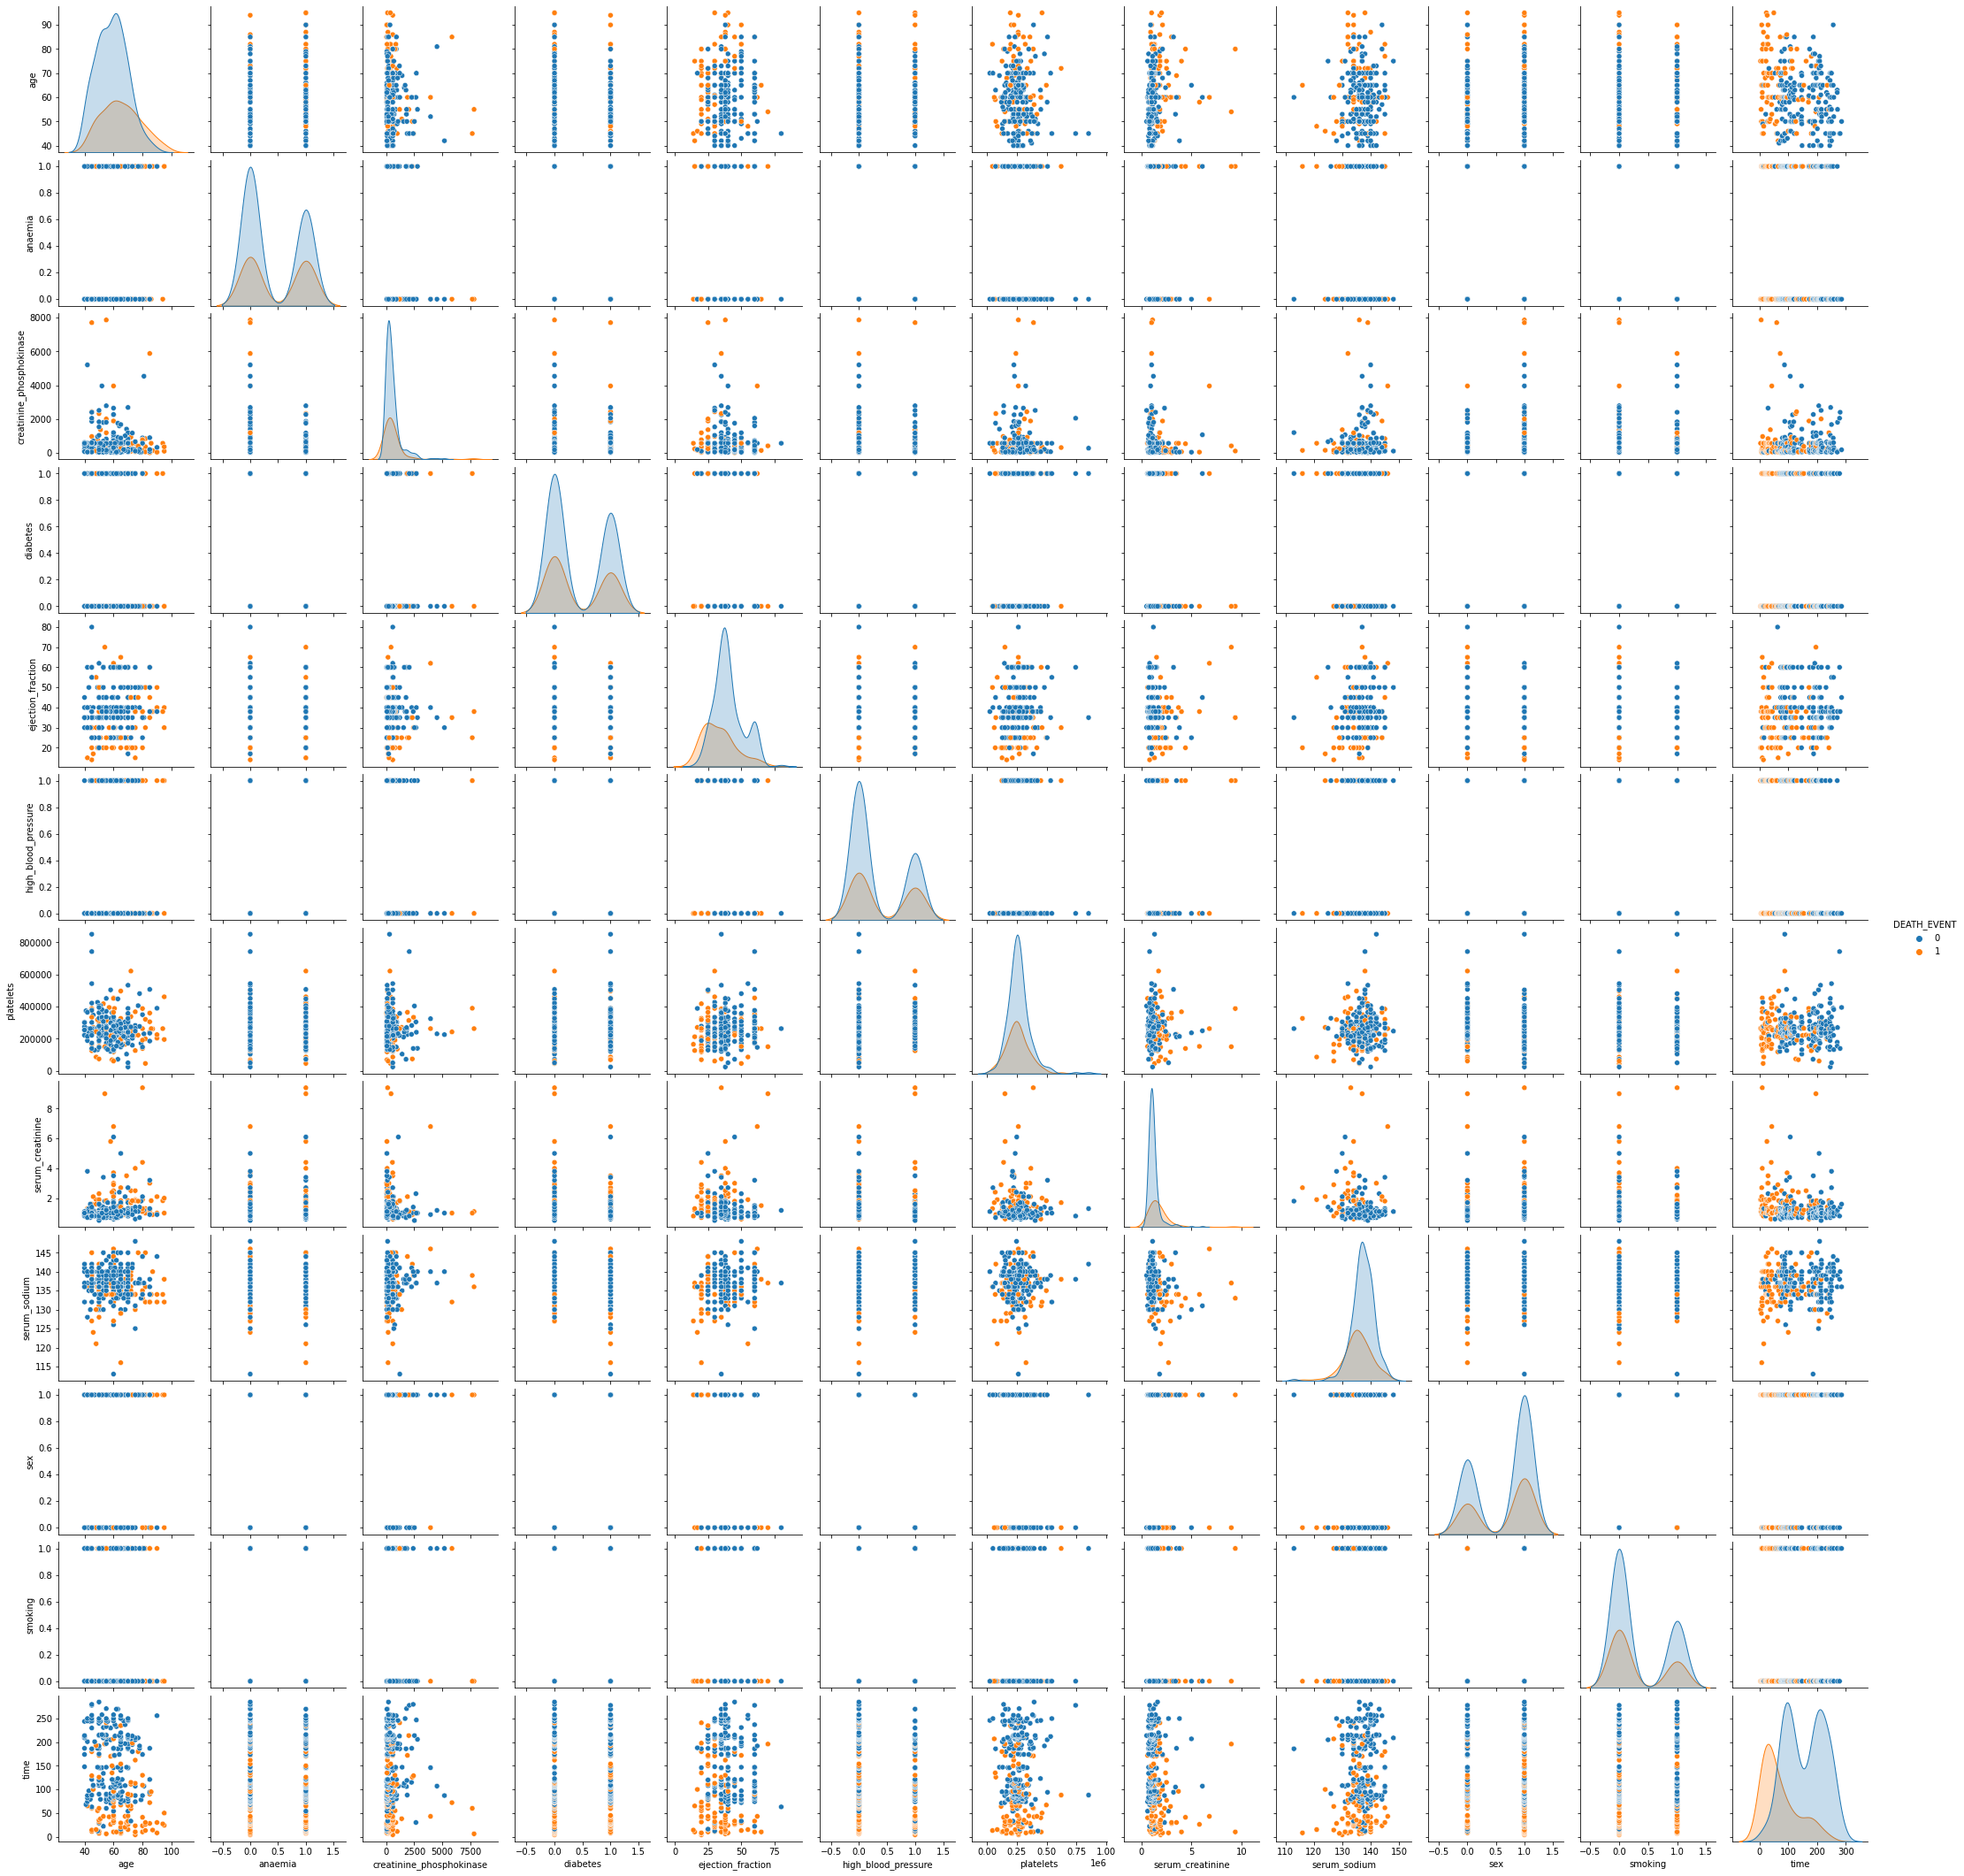

In [ ]:
sns.pairplot(data=df,hue='DEATH_EVENT')

### 6. Boxplot 계열을 이용하여 범주별 통계 확인하기


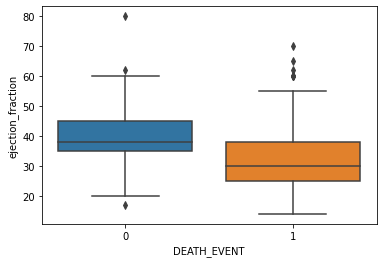

In [ ]:
# seaborn의 Boxplot 계열(boxplot(), violinplot(), swarmplot())을 사용

# 범주형변수: anaemia, diabetes, high_blood_pressure, sex, smoking, DEATH_EVENT

sns.boxplot(data=df, x='DEATH_EVENT', y='ejection_fraction')

# 박출계수가 낮을 수록 사망률이 더 높다
# boxplot은 outlier를 따로 빼서 보여주기때문에 통계 수치를 쉽게 비교할 수 있음
# 히스토그램은 겹쳐서 보여주기 때문에 많은 정도 한눈에 파악하기 어려움

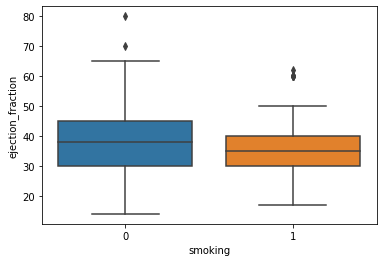

In [ ]:
sns.boxplot(data=df, x='smoking', y='ejection_fraction')
# 평균은 차이가 없지만 smoking한 사람이 ejection_fraction 값의 범위가 좁은 것을 알 수 있음

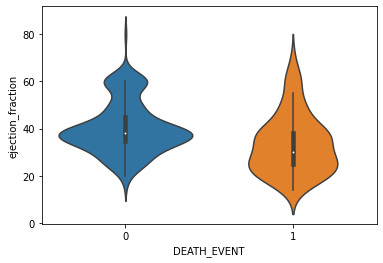

In [ ]:
sns.violinplot(data=df, x='DEATH_EVENT', y='ejection_fraction')
# boxplot의 variation -> 그렇게 많이 사용되진 않음 (프레젠테이션할 땐 boxplot)
# 안쪽에 boxplot, 바깥쪽은 histogram
# outlier까지 다 보여줌

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


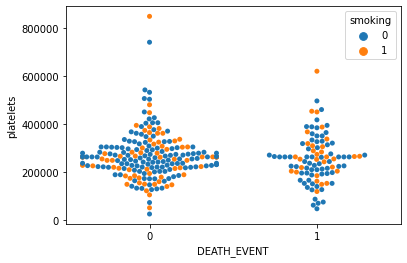

In [ ]:
sns.swarmplot(x='DEATH_EVENT', y='platelets', hue='smoking', data=df) # 혈소판 수

# swarmplot은 hue가 강력한 정보를 보여줌

## Step 3. 모델 학습을 위한 데이터 전처리


### 7. StandardScaler를 이용하여 데이터 전처리하기


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
# 수치형 입력 데이터, 범주형 입력 데이터, 출력 데이터로 구분하기
X_num = df[['age', 'creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium']]
X_cat = df[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']]
y = df['DEATH_EVENT']

In [ ]:
# 수치형 입력 데이터를 전처리하고 입력 데이터 통합하기
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)

# scaler를 해주고나면 X_scaled는 더이상 dataframe이 아니나 numpy 형식으로 바뀜
# 그래서 다시 인덱스와 컬럼 정보를 넣어주어서 dataframe으로 변환

X_scaled = pd.DataFrame(data=X_scaled, index=X_num.index, columns=X_num.columns)
X = pd.concat([X_scaled, X_cat], axis=1) # axis=1: 칼람을 붙여줌
X.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_blood_pressure,sex,smoking
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,0,0,1,1,0
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,0,0,0,1,0
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,0,0,0,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,1,0,0,1,0
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,1,1,0,0,0


### 8. 학습데이터와 테스트데이터 분리하기


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Step 4. Classification 모델 학습하기


### 9. Logistic Regression 모델 생성/학습하기


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# LogisticRegression 모델 생성/학습
model_lr = LogisticRegression(max_iter=1000) # verbose=1, 2 : 학습과정 보여줌
model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 10. 모델 학습 결과 평가하기


In [ ]:
from sklearn.metrics import classification_report
# 각각의 클래스를 양성(positive) 클래스로 보았을 때의 정밀도, 재현율, F1점수를 각각 구하고 그 평균값으로 전체 모형의 성능을 평가한다.

In [ ]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_lr.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84        64
           1       0.64      0.35      0.45        26

    accuracy                           0.76        90
   macro avg       0.71      0.63      0.65        90
weighted avg       0.74      0.76      0.73        90



- 0이라고 예측한 것 중 실제로 78%만 0이고, 1이라고 예측한 것 중 실제로 64%만 1이었음
- 실제 0인 데이터 중 92%만 맞췄고, 실제 1인 데이터 중 35%만 맞췄음

- macro: 단순평균
- weighted: 각 클래스에 속하는 표본의 갯수로 가중평균
- accuracy: 정확도. 전체 학습데이터의 개수에서 각 클래스에서 자신의 클래스를 정확하게 맞춘 개수의 비율.

### 11. XGBoost 모델 생성/학습하기


In [ ]:
from xgboost import XGBClassifier

In [ ]:
# XGBClassifier 모델 생성/학습
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

### 12. 모델 학습 결과 평가하기


In [ ]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_xgb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        64
           1       0.68      0.58      0.62        26

    accuracy                           0.80        90
   macro avg       0.76      0.73      0.74        90
weighted avg       0.79      0.80      0.79        90



### 13. 특징의 중요도 확인하기


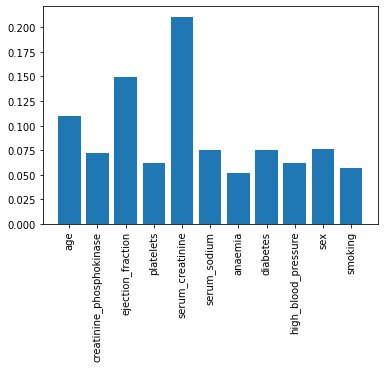

In [ ]:
# XGBClassifier 모델의 feature_importances_를 이용하여 중요도 plot
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()

# 혈중 크레아틴수, 박출계수, 나이가 제일 중요하다

## Step5 모델 학습 결과 심화 분석하기


### 14. Precision-Recall 커브 확인하기

In [ ]:
from sklearn.metrics import plot_precision_recall_curve

Text(0.5, 1.0, '2-model Precision-Recall curve')

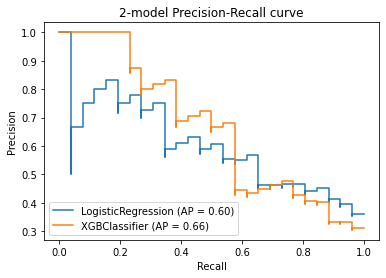

In [ ]:
# 두 모델의 Precision-Recall 커브를 한번에 그리기 (fig.gca()로 ax를 반환받아 사용)
fig = plt.figure()
ax = plt.gca()
plot_precision_recall_curve(model_lr, X_test, y_test, ax=ax)
plot_precision_recall_curve(model_xgb, X_test, y_test, ax=ax)
plt.title('2-model Precision-Recall curve')

# AP값이 1에 가까울수록 좋음 (recall과 precision 둘다 잘 유지하면서 높게하는 정도)

### 15. ROC 커브 확인하기

In [ ]:
from sklearn.metrics import plot_roc_curve

Text(0.5, 1.0, '2-model ROC-curve')

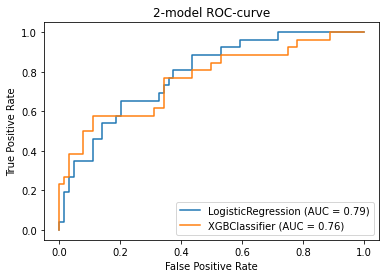

In [ ]:
# 두 모델의 ROC 커브를 한번에 그리기
fig = plt.figure()
ax = plt.gca()
plot_roc_curve(model_lr, X_test, y_test, ax=ax)
plot_roc_curve(model_xgb, X_test, y_test, ax=ax)
plt.title('2-model ROC-curve')

# False Positive를 최대한 낮게 하고싶음 -> 얼마나 빨리 True Positive가 1에 도달하는 지가 관건
# 이 경우에는 logistic regression이 더 좋게 나옴
# 종합적으로 비교했을 때 어느 것이 더 좋은 지 딱 정할 순 없어. 여러 가지로 비교할 필요 있음